In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Acquiring the dataset
data = pd.read_csv("Stock.csv", parse_dates = ["Date"])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-12,3.60,3.72,3.53,3.56,3.56,267662.0
1,2019-06-13,3.57,3.57,3.40,3.44,3.44,199485.0
2,2019-06-14,3.55,3.55,3.35,3.38,3.38,86411.0
3,2019-06-17,3.39,3.39,3.27,3.29,3.29,311552.0
4,2019-06-18,3.30,3.36,3.27,3.28,3.28,172005.0
...,...,...,...,...,...,...,...
240,2020-06-05,1.86,1.99,1.86,1.99,1.99,3439081.0
241,2020-06-08,2.17,2.18,2.10,2.18,2.18,7027088.0
242,2020-06-09,2.35,2.39,2.20,2.39,2.39,4528719.0
243,2020-06-10,2.49,2.50,2.46,2.50,2.50,1654513.0


In [3]:
# Extracting the date 
def extract_date(data,column):
    data[column+"year"] = data[column].apply(lambda x: x.year)
    data[column+"month"] = data[column].apply(lambda x: x.month)

In [4]:
# Previewing the dataset
extract_date(data, "Date")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dateyear,Datemonth
0,2019-06-12,3.60,3.72,3.53,3.56,3.56,267662.0,2019,6
1,2019-06-13,3.57,3.57,3.40,3.44,3.44,199485.0,2019,6
2,2019-06-14,3.55,3.55,3.35,3.38,3.38,86411.0,2019,6
3,2019-06-17,3.39,3.39,3.27,3.29,3.29,311552.0,2019,6
4,2019-06-18,3.30,3.36,3.27,3.28,3.28,172005.0,2019,6


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dateyear,Datemonth
240,2020-06-05,1.86,1.99,1.86,1.99,1.99,3439081.0,2020,6
241,2020-06-08,2.17,2.18,2.10,2.18,2.18,7027088.0,2020,6
242,2020-06-09,2.35,2.39,2.20,2.39,2.39,4528719.0,2020,6
243,2020-06-10,2.49,2.50,2.46,2.50,2.50,1654513.0,2020,6
244,2020-06-11,2.62,2.62,2.38,2.40,2.40,7061365.0,2020,6


## Exploring the dataset
- Date : This specifies the period of different stocks
- Open : This contains prices at which the stock is open
- High : This contains the highest stock prices at different dates
- Low  : This contains the lowest stock prices at different dates
- Close: This contains prices at which the stock is closed
- Adj Close is also the same as close 
- Volume:This contains the amount of volume of stocks traded at different dates

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
Date         245 non-null datetime64[ns]
Open         244 non-null float64
High         244 non-null float64
Low          244 non-null float64
Close        244 non-null float64
Adj Close    244 non-null float64
Volume       244 non-null float64
Dateyear     245 non-null int64
Datemonth    245 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 17.4 KB


- From the information above we can see that a certain date contains null values

In [7]:
# Describing the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dateyear,Datemonth
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,245.000000,245.000000
mean,2.135410,2.185574,2.041270,2.100492,2.100492,6.054834e+05,2019.444898,6.477551
std,0.511341,0.515418,0.491583,0.496265,0.496265,9.281298e+05,0.497972,3.478933
min,1.210000,1.310000,1.150000,1.210000,1.210000,0.000000e+00,2019.000000,1.000000
25%,1.795000,1.837500,1.717500,1.760000,1.760000,1.806108e+05,2019.000000,3.000000
50%,2.045000,2.090000,1.970000,2.005000,2.005000,3.238950e+05,2019.000000,7.000000
75%,2.332500,2.392500,2.185000,2.280000,2.280000,5.502340e+05,2020.000000,9.000000
max,3.600000,3.720000,3.530000,3.560000,3.560000,7.061365e+06,2020.000000,12.000000


### From the information above we now know the following
- The mean value for the stock prices under the following cases are as follows
  Open - 2.14
  High - 2.19
  Low  - 2.04
  Close- 2.10
- The mean value of the volume of stocks traded is 605483
- The maximum and minimum value for the stock prices under the following cases
  Open - 3.60, 1.21
  High - 3.72, 1.31
  Low  - 3.53, 1.15
  Close- 3.56, 1.21 
- The maximum and minimum value for the volume of stocks traded are 7061365 and 0 respectively  

In [8]:
# Checking for null values
data[data.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume,Dateyear,Datemonth
91,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN,2019,10


- from the above information we can denote that the data on 27th of October 2019 contains missing values

In [9]:
# Dropping null values
data.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Dateyear,Datemonth
0,2019-06-12,3.60,3.72,3.53,3.56,3.56,267662.0,2019,6
1,2019-06-13,3.57,3.57,3.40,3.44,3.44,199485.0,2019,6
2,2019-06-14,3.55,3.55,3.35,3.38,3.38,86411.0,2019,6
3,2019-06-17,3.39,3.39,3.27,3.29,3.29,311552.0,2019,6
4,2019-06-18,3.30,3.36,3.27,3.28,3.28,172005.0,2019,6
...,...,...,...,...,...,...,...,...,...
240,2020-06-05,1.86,1.99,1.86,1.99,1.99,3439081.0,2020,6
241,2020-06-08,2.17,2.18,2.10,2.18,2.18,7027088.0,2020,6
242,2020-06-09,2.35,2.39,2.20,2.39,2.39,4528719.0,2020,6
243,2020-06-10,2.49,2.50,2.46,2.50,2.50,1654513.0,2020,6


In [10]:
# Checking to see if the stock price goes higher or lower when the stock is Open or Close
Price_pivot = data.pivot_table(index="Open",values=['High', 'Low', 'Close'])
Price_pivot.head()

,Close,High,Low
Open,,,
1.21,1.29,1.31,1.21
1.23,1.45,1.46,1.23
1.25,1.25,1.35,1.17
1.27,1.29,1.35,1.24
1.28,1.22,1.35,1.18


- here we can see that if the price is low when the stock is open or close the
  highest and lowest prices will also fall within the range

In [11]:
Price_pivot.tail()

,Close,High,Low
Open,,,
3.38,3.27,3.38,3.21
3.39,3.29,3.39,3.27
3.55,3.38,3.55,3.35
3.57,3.44,3.57,3.40
3.60,3.56,3.72,3.53


- here we can see that if the price is high when the stock is open or close the highest
  and lowest prices will also fall within the range

In [12]:
# Let us create Volume bands and see where most of the stocks traded falls
data['VolumeBand'] = pd.cut(data['Volume'], 5)
data[['VolumeBand', 'Volume']].groupby(['VolumeBand'], as_index=False).count().sort_values(by='VolumeBand', ascending=True)

,VolumeBand,Volume
0,"(-7061.365, 1412273.0]",219
1,"(1412273.0, 2824546.0]",18
2,"(2824546.0, 4236819.0]",2
3,"(4236819.0, 5649092.0]",3
4,"(5649092.0, 7061365.0]",2


- here we can denote that most of the stocks traded falls below 1412273

In [13]:
# Looking for the correalation between volume bands,Open and Close
data['VolumeBand'] = pd.cut(data['Volume'], 5)
data[['VolumeBand', 'Open', 'Close']].groupby(['VolumeBand'], as_index=False).mean().sort_values(by='Open', ascending=True)

,VolumeBand,Open,Close
1,"(1412273.0, 2824546.0]",1.804444,1.792222
2,"(2824546.0, 4236819.0]",1.805000,1.995000
3,"(4236819.0, 5649092.0]",1.920000,2.186667
0,"(-7061.365, 1412273.0]",2.166210,2.123881
4,"(5649092.0, 7061365.0]",2.395000,2.290000


- from the information above we can see that stocks traded between 5649092-7061365 have the highest mean value of prices
  when the stock is opened and closed but this is biased because it contains just 2 values, while the stocks traded below        1412273
  have the second highest mean value and contains 219 values.

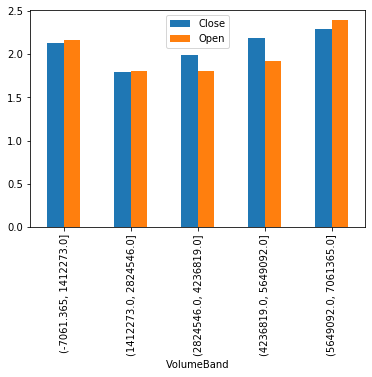

In [14]:
# Visualizing the data
Open_pivot = data.pivot_table(index="VolumeBand",values=['Open', 'Close'])
Open_pivot.plot.bar()
plt.show()

In [15]:
# Let us create Open bands and see where most of the stock prices falls when the stock is open
data['OpenBand'] = pd.cut(data['Open'], 5)
data[['OpenBand', 'Open']].groupby(['OpenBand'], as_index=False).count().sort_values(by='OpenBand', ascending=True)

,OpenBand,Open
0,"(1.208, 1.688]",38
1,"(1.688, 2.166]",117
2,"(2.166, 2.644]",59
3,"(2.644, 3.122]",8
4,"(3.122, 3.6]",22


- now we can see that when the stock is opened most of the stock prices falls between 1.688-2.166

In [16]:
# Let us create Open bands and see where most of the stock prices falls when the stock is open
data['CloseBand'] = pd.cut(data['Close'], 5)
data[['CloseBand', 'Close']].groupby(['CloseBand'], as_index=False).count().sort_values(by='CloseBand', ascending=True)

,CloseBand,Close
0,"(1.208, 1.68]",46
1,"(1.68, 2.15]",113
2,"(2.15, 2.62]",57
3,"(2.62, 3.09]",7
4,"(3.09, 3.56]",21


- now we can see that when the stock is closed most of the stock prices falls between 1.68-2.15

In [17]:
# Let's look at the year that has high stock prices
Dateyear_pivot = data.pivot_table(index="Dateyear",values=['Open', 'Close'])
Dateyear_pivot

,Close,Open
Dateyear,,
2019,2.284000,2.318074
2020,1.873211,1.909174


- In the year 2019 stock prices are high compared to 2020
- Stock prices are higher when the stock is open than when it is closed

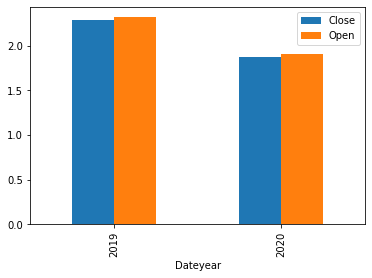

In [18]:
# Visualizing the data
Dateyear_pivot.plot.bar()
plt.show()

In [19]:
# Let's look at the year that has high stock prices
Datemonth_pivot = data.pivot_table(index="Datemonth",values=['Open', 'Close'])
Datemonth_pivot

,Close,Open
Datemonth,,
1,2.364783,2.406522
2,2.136842,2.212632
3,1.580000,1.633810
4,1.535000,1.535556
5,1.578421,1.600526
6,2.798636,2.825909
7,2.839565,2.894348
8,1.965000,2.021500
9,2.138421,2.152105


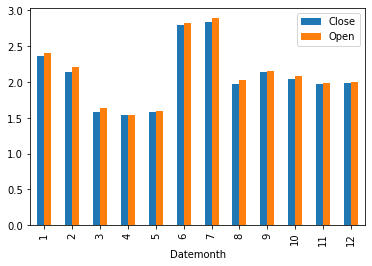

In [20]:
# Visualizing the data
Datemonth_pivot.plot.bar()
plt.show()

- Stock prices are highest during the 7th month which is July and are lowest in the 4th month which is April

In [21]:
# Let's look at the year that has the highest volume of stocks traded
Datemonth_pivot = data.pivot_table(index="Datemonth",values=['Volume'])
Datemonth_pivot

,Volume
Datemonth,
1,6.597907e+05
2,3.448182e+05
3,3.041588e+05
4,1.294484e+06
5,1.265323e+06
6,1.577893e+06
7,4.091753e+05
8,2.941860e+05
9,3.027901e+05


- the 6th month which is June has the highest volume of stocks traded
- the 10th month which is October has the lowest volume of stocks traded

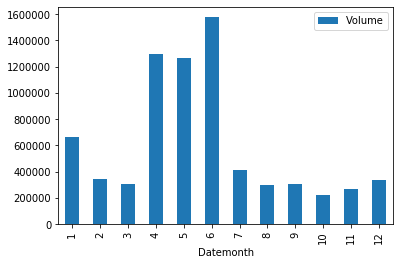

In [22]:
Datemonth_pivot.plot.bar()
plt.show()

In [23]:
# Let's look at the year that has the highest volume of stocks traded
Dateyear_pivot = data.pivot_table(index="Dateyear",values=['Volume'])
Dateyear_pivot

,Volume
Dateyear,
2019,301960.251852
2020,981406.541284


- from the above info most stocks were traded in the year 2020

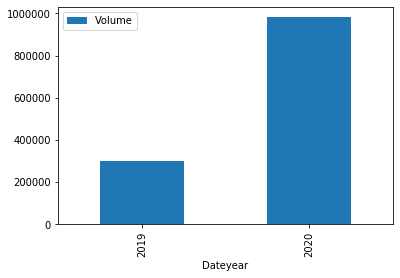

In [24]:
#Visualizing the data
Dateyear_pivot.plot.bar()
plt.show()